# Model Training


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"../data/gemstone.csv")

In [4]:
df = df.drop(columns="id", axis=1)

In [5]:
# independent and dependnet features


X = df.drop(columns="price", axis=1)
y = df["price"]

In [12]:
# catogorical and numerical split

# appling encoding like ordinal

catagorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns

cut_cat = ['Fair','Good','Very Good', 'Premium', 'Ideal']
color_cat = ['D','E', 'F','G','H','I' ,'J' ]
clarity_cat = ['I1','SI2','SI1','VS2', 'VS1','VVS2','VVS1','IF' ]


In [18]:
from sklearn.impute import SimpleImputer # handeling missing values on the basis of mean median and moost_frequest i.e mode

from sklearn.preprocessing import StandardScaler # for scaling the values 

from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder # for ordinal encoding or one hot encoding

from sklearn.pipeline import Pipeline   # for sequentialize the steps like imputer then scaler then scaling etc.

from sklearn.compose import ColumnTransformer # for groping the pipeline



In [22]:
# Numerical pipleine
numerical_pipeline = Pipeline(
    steps=[
        ("imputer" , SimpleImputer(strategy="median")),
        ("scaling",StandardScaler())
    ]
)


# Catagorical Pipeline

catagorical_pipeline = Pipeline(
    steps=[
        ("imputer" , SimpleImputer(strategy="most_frequent")),
        ("OrdinalEncoder",OrdinalEncoder(categories= [cut_cat,color_cat,clarity_cat])),
        ("scaling", StandardScaler())
    ]
)

In [24]:
# combine the pipeline

preprocessor = ColumnTransformer(
    [
    ("num_pipe", numerical_pipeline, numerical_features),
    ("cat_pipe", catagorical_pipeline, catagorical_features)
    ]
) 

In [45]:
# train test split

from sklearn.model_selection import train_test_split

X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)



In [46]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())

X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())

In [47]:
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                ('cat_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Premium',
                                                                              'Ideal'],
                                                                             ['D',
                                                                              'E',
                                                                              'F',
                                                                              'G',
                                                                              'H',
                                                                              'I',
                                                                              'J'],
                                                                             ['I1',
                                                                              'SI2',
                                                                              'SI1',
                                                                              'VS2',
                                                                              'VS1',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'IF']])),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['cut', 'color', 'clarity'], dtype='object'))])

# Model Training

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [49]:
regressor.coef_

array([ 6432.97591819,  -132.34206204,   -70.48787525, -1701.38593925,
        -494.17005097,   -76.32351645,    68.80035873,  -464.67990411,
         652.10059539])

In [50]:
regressor.intercept_

3976.878738902296

In [51]:
y_pred  = regressor.predict(X_test)

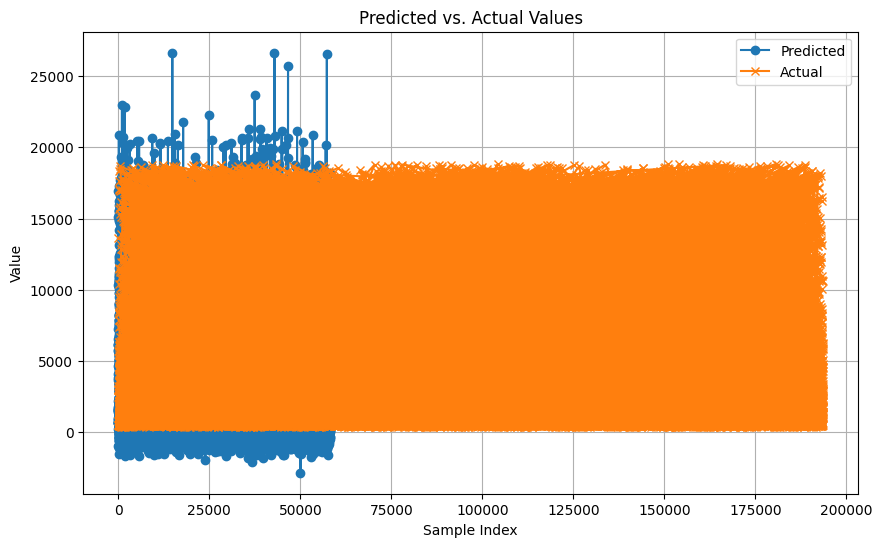

In [52]:
import matplotlib.pyplot as plt


# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.title("Predicted vs. Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")

# Plot ypred and y_test
plt.plot(y_pred, label='Predicted', marker='o')
plt.plot(y_test, label='Actual', marker='x')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# automating the model performance check and selecting model

In [59]:
import numpy as np
def evaluate_model(true , predictor):
    mse = mean_squared_error(true,predictor)
    mae = mean_absolute_error(true,predictor)
    rmse = np.sqrt(mse)
    r2_sco = r2_score(true, predictor)
    return mse,mae,rmse,r2_sco

In [83]:
# models

models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "ElasticNet":ElasticNet()
}

train_model_list = dict()
models_list = list()
r2_list=list()


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    mse,mae,rmse,r2 = evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("model training performance")
    print("rmse: ", rmse*100)
    print("mse and mae : " , mse*100 ," ",  mae*100)
    print("r2_score : ", r2*100)

    train_model_list[model] = r2*100

    r2_list.append(r2)

    print("="*35)
    print("\n")




LinearRegression
model training performance
rmse:  101462.96630375466
mse and mae :  102947335.31156853   67507.58270067467
r2_score :  93.62906819996047


Ridge
model training performance
rmse:  101463.432335344
mse and mae :  102948281.0126893   67510.77629781328
r2_score :  93.62900967491633


Lasso
model training performance
rmse:  101465.9130275064
mse and mae :  102953315.06505492   67624.21173665511
r2_score :  93.62869814082755


ElasticNet
model training performance
rmse:  153335.4124590231
mse and mae :  235117487.13978735   106094.32977142998
r2_score :  85.44967219374031




In [84]:
max_key = max(train_model_list, key=train_model_list.get)
max_value = train_model_list[max_key]
print(f"The best model with max r2 score is '{max_key}' having score {max_value}.")

The best model with max r2 score is 'LinearRegression()' having score 93.62906819996047.


In [85]:
models_list

['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']